<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Programming_06_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# It's Time to Play Ball (with `matplotlib`)!
### Brendan Shea, PhD

Matplotlib is a powerful and versatile plotting library in Python, widely used for data visualization. It's an essential tool in the toolbox of any data scientist, engineer, or analyst. Matplotlib provides a wide range of plotting functions that make it easy to create static, animated, and interactive visualizations. It excels in making complex tasks simple and straightforward, turning raw data into clear, comprehensible visuals.

One of the strengths of Matplotlib is its ability to integrate with other Python libraries like NumPy and Pandas, allowing for efficient data manipulation and visualization. Whether you're working on a detailed scientific plot, a histogram for statistical data, or a simple line chart, Matplotlib has the functionality you need.

Some main types of graphics supported by matplotlib include the following.

| Type of Graph | Description |
| --- | --- |
| Line Graph | Useful for showing trends over time. |
| Bar Chart | Ideal for comparing quantities among different groups. |
| Histogram | Best for showing the distribution of a dataset. |
| Scatter Plot | Excellent for observing the relationship between two variables. |
| Pie Chart | Suitable for displaying data proportions in a whole. |
| Box Plot | Efficient for depicting groups of numerical data through their quartiles. |
| Heatmap | Great for representing data density or intensity of variables, revealing patterns in complex datasets. |

Imagine a sport popular among Munchkins in the land of Oz, called "Emerald Ball." In this game, players score points by tossing a magical ball into various enchanted hoops. Let's visualize the average scores of top Munchkin players using Matplotlib.

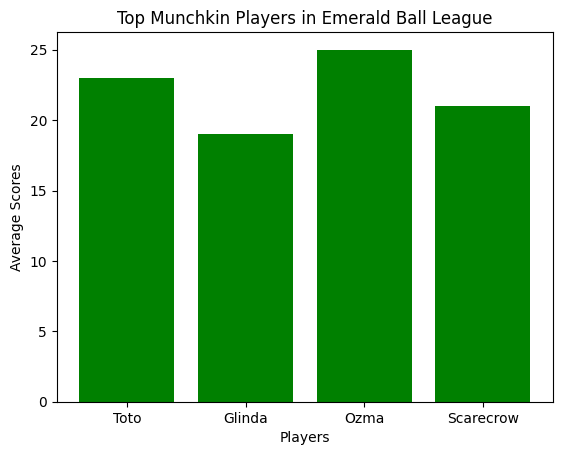

In [1]:
import matplotlib.pyplot as plt

# Sample data for Munchkin players
players = ['Toto', 'Glinda', 'Ozma', 'Scarecrow']
average_scores = [23, 19, 25, 21]

plt.bar(players, average_scores, color='green')
plt.xlabel('Players')
plt.ylabel('Average Scores')
plt.title('Top Munchkin Players in Emerald Ball League')
plt.show()


In this example:

-   We import the `matplotlib.pyplot` module, a primary module in Matplotlib used for plotting graphs.
-   The `players` list contains the names of the players, and `average_scores` represents their corresponding scores.
-   `plt.bar()` creates a bar chart, with `players` on the x-axis and `average_scores` on the y-axis.
-   The `color` parameter in `plt.bar()` is set to 'green', aligning with the emerald theme of Oz.
-   `plt.xlabel()` and `plt.ylabel()` add labels to the x-axis and y-axis, respectively.
-   `plt.title()` provides a title to the bar chart.
-   Finally, `plt.show()` displays the plot.


In this chapter, we'll be exploring how to create a variety of visualizations.

## Intro the Baseball Data Set
In order to demonstrate the functionality of `matplotlib`, we'll explore the widely used  `baseball` dataset. This data set encapsulates the yearly batting records of major league baseball players, serves as an ideal resource for exploring rich, numeric data in the context of data science education. This dataset, sourced from <http://www.baseball-databank.org/> (now defunct), encompasses 21,699 records and covers 1,228 players spanning the years 1871 to 2007. Its inclusion criteria emphasize players with more than 15 seasons of play, ensuring a wealth of longitudinal data.

### Why Use This Dataset?
I realize many of you may not know much about baseball, and that's OK! Here's the idea behing using this data.

1.  The dataset's extensive range of variables and historical depth provides a fertile ground for applying various data science techniques for anaylsis and visualization.

2. The dataset is predominantly numeric, a trait that simplifies certain types of analysis and visualization, especially for beginners.

3. Baseball, as a sport, is quantitatively driven, making this dataset an exemplary case for understanding how data analysis can offer insights into real-world scenarios.

### Dataset Format

The dataset is structured as a data frame with dimensions 21,699 x 22, meaning it contains 21,699 records across 22 variables.
### Key Variables

-   id: A unique identifier for each player.
-   year: The specific year of the record.
-   team, lg: Information about the team and league.
-   g, ab, r: Game statistics including the number of games, times at bat, and runs.
-   h, X2b, X3b, hr: Hit details, including total hits and hits resulting in reaching different bases.
-   rbi, sb, cs: Runs batted in and base-stealing statistics.
-   bb, so, ibb: Walks and strikeouts, both intentional and overall.
-   hbp, sh, sf, gidp: Other batting statistics like hits by pitch and sacrifice hits.

We are going to reduce the size of the data set (by focusing on players after 1900 and dropping a few columns).


In [ ]:
!pip install pydataset -q # Install required packages
from pydataset import data
import pandas as pd # More on this below

baseball_df = data('baseball') # Load the baseball dataset

In [ ]:
# drop players before 1914 (when Babe Ruth started)
baseball_df = baseball_df[baseball_df.year >= 1914]
# drop ibb, sf, cs, gidp
baseball_df = baseball_df.drop(columns=['ibb', 'sf', 'cs', 'gidp'])

KeyError: "['ibb', 'sf', 'cs', 'gidp'] not found in axis"

## Basic Data Exploration
Let's take a brief look at the data before moving on to visualizations.

In [ ]:
# Display the first few records
baseball_df.head()

,id,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,bb,so,hbp,sh
14423,ainsmed01,1914,1,WS1,AL,62,151,11,34,7,0,0,13.0,8.0,9,28.0,1.0,1.0
14425,altroni01,1914,1,WS1,AL,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
14427,austiji01,1914,1,SLA,AL,130,466,55,111,16,4,0,30.0,20.0,40,59.0,1.0,16.0
14441,bendech01,1914,1,PHA,AL,28,62,4,9,1,0,1,8.0,0.0,4,13.0,0.0,4.0
14460,bressru01,1914,1,PHA,AL,29,51,6,11,1,1,0,4.0,0.0,6,7.0,1.0,2.0


In [ ]:
# Information about data types and missing values
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19194 entries, 14423 to 89534
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      19194 non-null  object 
 1   year    19194 non-null  int64  
 2   stint   19194 non-null  int64  
 3   team    19194 non-null  object 
 4   lg      19194 non-null  object 
 5   g       19194 non-null  int64  
 6   ab      19194 non-null  int64  
 7   r       19194 non-null  int64  
 8   h       19194 non-null  int64  
 9   X2b     19194 non-null  int64  
 10  X3b     19194 non-null  int64  
 11  hr      19194 non-null  int64  
 12  rbi     19194 non-null  float64
 13  sb      19194 non-null  float64
 14  bb      19194 non-null  int64  
 15  so      19194 non-null  float64
 16  hbp     19192 non-null  float64
 17  sh      19194 non-null  float64
dtypes: float64(5), int64(10), object(3)
memory usage: 2.8+ MB
